In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Trabajo Práctico 2: Método SOR

### *Primer Cuatrimestre 2022*
#### Integrantes: 
1.  Domazet, Alejandro   (L.U. : 230/18)
2. Klimkowski, Victoria  (L.U. : 1390/21)
3. de Erausquin, Carla   (L.U. : 126/18)

#Ejercicio 1:
Para este ejercicio implementamos el método de Jacobi para resolver sistemas de ecuaciones. Para ello pasamos como parámetro además de los vectores iniciales y la matriz, la cantidad de iteraciones y la tolerancia. Estas últimas dos variables son de control: la primera delimita la cantidad de veces que se ejecuta el ciclo for, cuyo parámetro por omisión es 50, como se pide en el ejercicio 2. La segunda se encarga de que, de converger antes de las iteraciones control, el ciclo se corte y se retorne la solución y la cantidad de iteraciones. 
Para la tolerancia se implementó una función que calcula el error relativo y es este el que se compara con la tolerancia. 


In [ ]:
def errorRelativo(A, x, b):
  axb = A@x - b #Calculamos Ax-b

  norm_Axb = np.linalg.norm(axb, 2) #Pedimos la norma dos 
  norm_b = np.linalg.norm(b, 2)

  error = norm_Axb/norm_b #Calculamos el error absoluto

  return error

def jacobiEq(A, b, x0, s = 50, tol = 1e-8): 
    n = np.shape(A)[0]
    xOld = x0
    xNew = np.zeros(n)

    for k in range(s):
        for i in range(n):
            xNew[i] = (b[i] - (sum(A[i,:]*xOld) - A[i,i] * xOld[i])) / A[i,i]
        xOld = xNew.copy()      #Usamos copy para copiar vectores
        
        if errorRelativo(A, xNew, b) < tol: #Revisamos la tolerancia
          return xNew, k+1  #Convergió antes de llegar a las s iteraciones
      
    return xNew, k+1 #No convergió antes de s iteraciones

#Ejercicio 2:
Para este ejercicio se pedía resolver un sistema puntual por lo que la función generada no recibe parámetros y sencillamente llama a la función del método Jacobi implementada en el ejercicio 1. Luego, comparamos la cantidad de iteraciones que le llevó al método para llegar a la solución (si es que llegó a alguna en 50 o menos).

In [ ]:
def ejercicio2():
  #Inicializamos variables del ejercicio, por eso no pedimos parámetros
  matriz = np.array([[4,2,1],[1,4,1],[2,1,5]])
  b = np.array([9,5,0])
  x0 = np.array([1,1,1])

  #Llamamos a Jacobi
  sol, iter = jacobiEq(matriz, b, x0)

  print("El vector solución es:\n {} \n y terminó en {} iteraciones".format(sol, iter))

  if iter == 50 :
    print("Por lo tanto, el método no convergió en 50 iteraciones")
  else :
    print("Por lo tanto, el método convergió")

  return 0 


In [ ]:
ejercicio2()

El vector solución es:
 [ 2.00000001  1.         -0.99999999] 
 y terminó en 36 iteraciones
Por lo tanto, el método convergió


0

#Ejecicio 3:

In [ ]:
def metodoSOR(A, x0, b, w, s = 50, tol = 1e-8):
    n = np.shape(A)[0] 

    #Definimos L, U y D
    
    L = np.tril(A, -1) #Parámetro -1 para que las diagonales también las borre
    U = np.triu(A, 1)
    D = np.diag(np.diag(A))

    #Notamos que, para cada iteración debemos multiplicar por (D + wL)^-1 por lo que
    #lo generamos como una constante
    cte = np.linalg.inv(D + w*L)

    xOld = x0
    xNew = np.zeros(n)

    for k in range(s):
      xNew = cte @ (w*b - (w*U + (w - 1) * D) @ xOld)
      
      if errorRelativo(A, xNew, b) < tol: #Revisamos la tolerancia
          return xNew, k+1  #Convergió antes de llegar a las s iteraciones

      xOld = xNew.copy() 
      
    return xNew, k+1 #No convergió antes de s iteraciones

#Ejercicio 4:


In [ ]:
def ejercicio4():
  #Inicializamos variables del ejercicio, por eso no pedimos parámetros
  matriz = np.array([[4,2,1],[1,4,1],[2,1,5]])
  b = np.array([9,5,0])
  x0 = np.array([1,1,1])

  #Llamamos a SOR
  sol_1, iter_1 = metodoSOR(matriz, x0, b, 1)
  sol_2, iter_2 = metodoSOR(matriz, x0, b, 1.5)
  sol_3, iter_3 = metodoSOR(matriz, x0, b, 2.5)

  print("El vector solución es:\n {} \n y terminó en {} iteraciones".format(sol_1, iter_1))

  if iter_1 == 50 :
    print("Por lo tanto, el método no convergió en 50 iteraciones con w = 1")
  else :
    print("Por lo tanto, el método convergió con w = 1")

  print("El vector solución es:\n {} \n y terminó en {} iteraciones".format(sol_2, iter_2))

  if iter_2 == 50 :
    print("Por lo tanto, el método no convergió en 50 iteraciones con w = 1.5")
  else :
    print("Por lo tanto, el método convergió con w = 1.5")

  print("El vector solución es:\n {} \n y terminó en {} iteraciones".format(sol_3, iter_3))

  if iter_3 == 50 :
    print("Por lo tanto, el método no convergió en 50 iteraciones con w = 2.5")
  else :
    print("Por lo tanto, el método convergió con w = 2.5")

  return 0 



In [ ]:
ejercicio4()

El vector solución es:
 [ 1.99999998  1.         -0.99999999] 
 y terminó en 13 iteraciones
Por lo tanto, el método convergió con w = 1
El vector solución es:
 [ 1.99999998  0.99999999 -1.        ] 
 y terminó en 43 iteraciones
Por lo tanto, el método convergió con w = 1.5
El vector solución es:
 [-2.01349162e+11  1.21088400e+11  2.93734627e+11] 
 y terminó en 50 iteraciones
Por lo tanto, el método no convergió en 50 iteraciones con w = 2.5


0

#Ejercicio 5


In [ ]:
#Como se pide la matriz del ejercicio 5 en varias instancias más, vamos a generarla como variable global
#Armamamos la matriz A y los vectores x y b
random.seed(10)
A_glob = np.zeros((5, 5))
x_glob = np.zeros(5)
b_glob = np.zeros(5)

for i in range(5):
  x_glob[i] = random.random()
  b_glob[i] = random.random()
  for j in range(5):
    if i == j :
      A_glob[i][j] = 4
    else:
      A_glob[i][j] = random.random()

print(A_glob)

[[4.         0.5780913  0.20609823 0.81332125 0.82358887]
 [0.52066936 4.         0.32777281 0.24999668 0.95281691]
 [0.86016104 0.60319061 4.         0.38160599 0.28361822]
 [0.68586149 0.66184632 0.13297814 4.         0.76783781]
 [0.61332682 0.04426063 0.00405514 0.13397253 4.        ]]


In [ ]:
def ejercicio5():

  #Llamo a Jacobi
  sol, iter = jacobiEq(A_glob, x_glob, b_glob, 100)

  print("El vector solución es:\n {} \n y terminó en {} iteraciones".format(sol, iter))

  if iter == 100 :
    print("Por lo tanto, el método no convergió en 100 iteraciones")
  else :
    print("Por lo tanto, el método convergió")

  return 0

ejercicio5()


El vector solución es:
 [0.05386263 0.07849122 0.20011858 0.09512223 0.23308713] 
 y terminó en 25 iteraciones
Por lo tanto, el método convergió


0

#Ejercicio 6:

In [ ]:
#Primero generamos el arreglo con 1001 valores de [0, 2]
#Lo definimos global porque se usa de nuevo más adelante: 

valores = np.linspace(0, 2, 1001)

def ejercicio6(): 
  iters = [0] * len(valores)
  convergen = [] 

  #Vamos llamando al método SOR y vamos rellenando el arreglo de iteraciones
  #Además tenemos otro arreglo en el cual incluimos únicamente los w correspondientes a los casos en los que haya convergencia
  for i in range(len(valores)):
    sol, iter_actual = metodoSOR(A_glob, x_glob, b_glob, valores[i], 100)
    iters[i] = iter_actual
    if(iter_actual < 100):
      convergen.append(valores[i])
  

  #Retornamos únicamente el primer y último valor de convergencia (intervalo):
  res = []
  res.append(convergen[0])
  res.append(convergen[len(convergen)-1])

  #Pedimos el mínimos de convergencia y buscamos el w al que le corresponde:
  minimo = min(iters)
  minimos = []

  for i in range(len(valores)):
    if (iters[i] == minimo):
      minimos.append(valores[i])

  #Notamos que hay más de un omega que alcanza el mínimo así que devolvemos un arreglo con los w con la menor cantidad de iteraciones:

  #Puntos a, c y d respectivamente
  return iters, res, minimos

ejercicio6()
  

([100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  99,
  98,
  97,
  96,
  95,
  94,
  93,
  92,
  91,
  90,
  90,
  89,
  88,
  87,
  86,
  85,
  85,
  84,
  83,
  82,
  81,
  81,
  80,
  79,
  79,
  78,
  77,
  76,
  76,
  75,
  74,
  74,
  73,
  73,
  72,
  71,
  71,
  70,
  70,
  69,
  68,
  68,
  67,
  67,
 

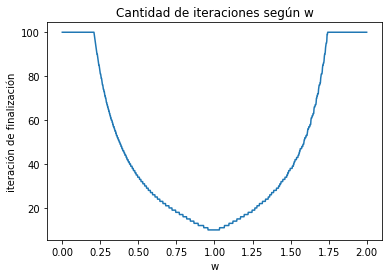

In [ ]:
def graficoEjercicio6():
  iters = ejercicio6()[0]
  
  #Graficamos el punto b
  plt.plot(valores, iters)
  plt.xlabel("w")
  plt.ylabel("iteración de finalización")
  plt.title("Cantidad de iteraciones según w")

graficoEjercicio6()

#Ejercicio 7:

In [ ]:
def radioEspectralSOR(A, w):
    #Definimos L, U y D
    L = np.tril(A, -1) #Parámetro -1 para que las diagonales también las borre
    U = np.triu(A, 1)
    D = np.diag(np.diag(A))

    #Notamos que, para cada iteración debemos multiplicar por (D + wL)^-1 por lo que
    #lo generamos como una constante
    cte = np.linalg.inv(D + w*L)

    T = cte @ (- (w*U + (w - 1) * D))
  
    espectral = max(abs(np.linalg.eigvals(T)))
    
    return espectral, T

radioEspectralSOR(A_glob, 0.996)

(0.10162741095172384,
 array([[ 0.004     , -0.14394473, -0.05131846, -0.20251699, -0.20507363],
        [-0.00051859,  0.02266196, -0.07496216, -0.03599352, -0.2106643 ],
        [-0.00077883,  0.0274264 ,  0.02625029, -0.04623875,  0.00494236],
        [-0.00057187,  0.01994   ,  0.0202487 ,  0.04604851, -0.12161547],
        [-0.00058529,  0.02104038,  0.00796144,  0.0298353 ,  0.04169222]]))

#Ejercicio 8:

In [ ]:
def ejercicio8(): 
  radios = [0] * len(valores)
  menores_uno = [] 

  #Vamos llamando al método SOR y vamos rellenando el arreglo de iteraciones
  #Además tenemos otro arreglo en el cual incluimos únicamente los w correspondientes a los casos en los que haya convergencia
  for i in range(len(valores)):
    radio_actual, T = radioEspectralSOR(A_glob, valores[i])
    radios[i] = radio_actual
    if(radio_actual < 1):
      menores_uno.append(valores[i])
  

  #Retornamos únicamente el primer y último valor de convergencia (intervalo):
  res = []
  res.append(menores_uno[0])
  res.append(menores_uno[len(menores_uno)-1])

  #Pedimos el mínimos de convergencia y buscamos el w al que le corresponde:
  minimo = min(radios)
  minimos = []

  for i in range(len(valores)):
    if (radios[i] == minimo) :
      minimos.append(valores[i])

  #Puntos a, c y d respectivamente
  return radios, res, minimos

ejercicio8()

([1.0,
  0.9984203302673261,
  0.9968397093119465,
  0.995258134159001,
  0.9936756018149944,
  0.9920921092676303,
  0.9905076534856412,
  0.9889222314185968,
  0.9873358399967311,
  0.9857484761307607,
  0.9841601367116952,
  0.9825708186106548,
  0.9809805186786797,
  0.9793892337465316,
  0.9777969606245132,
  0.9762036961022673,
  0.9746094369485709,
  0.9730141799111388,
  0.9714179217164247,
  0.9698206590694128,
  0.968222388653408,
  0.9666231071298226,
  0.9650228111379764,
  0.9634214972948638,
  0.9618191621949426,
  0.9602158024099173,
  0.958611414488517,
  0.9570059949562495,
  0.9553995403152011,
  0.953792047043783,
  0.9521835115965067,
  0.950573930403743,
  0.9489632998714803,
  0.947351616381091,
  0.9457388762890709,
  0.9441250759268,
  0.9425102116002884,
  0.9408942795899159,
  0.9392772761501852,
  0.9376591975094467,
  0.936040039869642,
  0.934419799406038,
  0.9327984722669472,
  0.9311760545734584,
  0.929552542419162,
  0.9279279318698707,
  0.92630221896

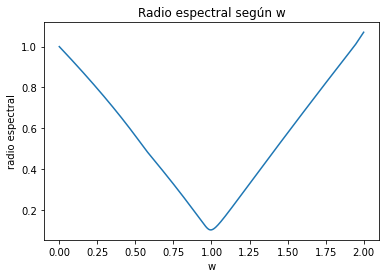

In [ ]:
def graficoEjercicio8():
  radios = ejercicio8()[0]
  
  #Graficamos el punto b
  plt.plot(valores, radios)
  plt.xlabel("w")
  plt.ylabel("radio espectral")
  plt.title("Radio espectral según w")
  plt.show()
  
graficoEjercicio8()

e) A diferencia del punto anterior, nuestro arreglo de "mínimos" contiene un solo elemento, el cual se corresponde al de mínimo radio espectral. El "w" correspondiente a este radio espectral, sin embargo, se encuentra dentro de la lista de mínimos anterior. Esto es, converge en la mínima cantidad de iteraciones (10 en este caso) al igual que los otros mínimos hallados en el ejercicio anterior.

La razón por la que hay varios w que terminan en la misma cantidad de iteraciones está ligada a la tolerancia.

#Ejercicio 9

In [ ]:
def ejercicio9():
  determinantes = [0] * len(valores)
  menores_uno = [] 

  #Vamos llamando al método SOR y vamos rellenando el arreglo de iteraciones
  #Además tenemos otro arreglo en el cual incluimos únicamente los w correspondientes a los casos en los que haya convergencia
  for i in range(len(valores)):
    radio_actual, T = radioEspectralSOR(A_glob, valores[i])
    det_actual = np.linalg.det(T)
    determinantes[i] = det_actual
    if(det_actual < 1):
      menores_uno.append(valores[i])


  #Retornamos únicamente el primer y último valor que hacen al determinante menor a 1 (intervalo):
  res = []
  res.append(menores_uno[0])
  res.append(menores_uno[len(menores_uno)-1])

  #Pedimos el mínimos de convergencia y buscamos el w al que le corresponde:
  minimo = min(determinantes)
  minimos = []

  for i in range(len(valores)):
    if (determinantes[i] == minimo) :
      minimos.append(valores[i])

  #Puntos a, c y d respectivamente
  return determinantes, res, minimos

ejercicio9()


([1.0,
  0.990039920079968,
  0.980159361278976,
  0.970357846472224,
  0.960634900447232,
  0.9509900498999999,
  0.9414228234311679,
  0.9319327515421759,
  0.922519366631424,
  0.913182202990432,
  0.9039207967999999,
  0.8947346861263679,
  0.885623410917376,
  0.8765865129986239,
  0.8676235360696318,
  0.8587340256999999,
  0.8499175293255679,
  0.8411735962445759,
  0.8325017776138238,
  0.8239016264448319,
  0.8153726975999999,
  0.8069145477887678,
  0.7985267355637758,
  0.7902088213170239,
  0.7819603672760318,
  0.7737809374999998,
  0.7656700978759678,
  0.7576274161149757,
  0.7496524617482238,
  0.7417448061232318,
  0.7339040223999997,
  0.7261296855471677,
  0.7184213723381757,
  0.7107786613474238,
  0.7032011329464318,
  0.6956883692999998,
  0.6882399543623677,
  0.6808554738733762,
  0.6735345153546242,
  0.6662766681056321,
  0.6590815232000001,
  0.6519486734815682,
  0.6448777135605761,
  0.6378682398098241,
  0.6309198503608321,
  0.6240321451000002,
  0.617204

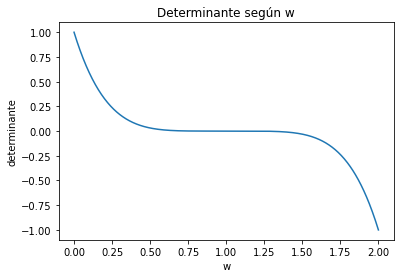

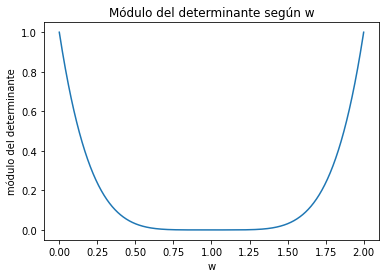

In [ ]:
def graficoEjercicio9():
  determinantes = ejercicio9()[0]
  
  #Graficamos el punto b
  plt.plot(valores, determinantes)
  plt.xlabel("w")
  plt.ylabel("determinante")
  plt.title("Determinante según w")
  plt.show()

  #También graficamos con los módulos de los determinantes
  determinantesMod = [abs(ele) for ele in determinantes]

  plt.plot(valores, determinantesMod)
  plt.xlabel("w")
  plt.ylabel("módulo del determinante")
  plt.title("Módulo del determinante según w")
  plt.show()

  
graficoEjercicio9()


Del gráfico superior que relaciona el determinante con omega, podemos decir que el determinante no es útil al momento de definir si una matriz de iteración del método converge más rápido respecto a otra. De acuerdo al ejercicio 6 de la práctica 5, el cual plantea que para toda matriz $B \in \mathbb{R}^{n × n}$ con $|det(B)|>1$ tiene un autovalor $\lambda$, real o complejo, con $|λ|>1$, podemos juzgar si una matriz de iteración no convergerá si su determinante es mayor que uno. Como todas las matrices con $\omega \in [0,2]$ tienen determinante a lo sumo uno (de acuerdo al gráfico), no podremos decir con exactitud si tal matriz convergerá en más o menos iteraciones, e incluso tampoco podríamos afirmar si la matriz en cuestión converge. 

El módulo del determinante es menor conforme w se acerca a 1 y en 1 es 0.


#Ejercicio 10:

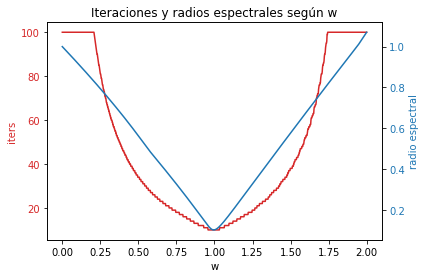

In [ ]:
def ejercicio10():
  data1 = ejercicio6()[0]
  data2 = ejercicio8()[0]

  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('w')
  ax1.set_ylabel('iters', color=color)
  ax1.plot(valores, data1, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2=ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('radio espectral', color=color)
  ax2.plot(valores, data2, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  plt.title("Iteraciones y radios espectrales según w")
  fig.tight_layout
  plt.show()

ejercicio10()